<img src="./img/andalusia.png">

# Tourism in Andalusia from 2018 to 2022

<a id="index"></a> <br>
## Index:

#### 1.- First Steps
1.1.- [Introduction](#1)  
1.2.- [Hypotheses](#2)  
1.3.- [Data Collection](#3)  
1.4.- [Library Imports](#4)

#### 2.- Analysis
2.1.- [Foreign Tourists Visiting Spain VS Foreign Tourists Visiting Andalusia](#5)  
2.2.- [Domestic Tourists Traveling VS Domestic Tourists Visiting Andalusia](#6)  
2.3.- [Type of Trips by Foreign Tourists in Andalusia VS Type of Trips by Domestic Tourists in Andalusia](#7)  
2.4.- [Spending of Foreign Tourists in Andalusia VS Spending of Domestic Tourists in Andalusia](#8)  
2.5.- [BONUS: Foreign Tourism in Spain by Country of Origin](#9)

## First Steps

<a id="1"></a> <br>
### Introduction

In this EDA, we will study the following:
- Analyze the total number of foreign tourists coming to Spain, comparing it with those specifically visiting the Autonomous Community of Andalusia.
- Analyze the total number of domestic tourists, comparing it with those choosing Andalusia as their destination.
- Analyze the nature of trips taken by foreign tourists versus the nature of trips taken by domestic tourists, all within Andalusia.
- Analyze the spending of foreign tourists in Andalusia, comparing it with the spending of domestic tourists in the same destination.

The data has been obtained in the following manner:
- Tables in .csv format containing the necessary data for each analysis, extracted from the National Institute of Statistics (INE) via the [following link](https://www.ine.es/dyngs/INEbase/es/categoria.htm?c=Estadistica_P&cid=1254735570703).

<a id="2"></a> <br>
### Hypotheses

With the data we have, we will attempt to resolve the following hypotheses:
- To see the number of foreign and domestic tourists choosing Andalusia as a destination versus other options.
- To check which type of travel predominates within the Autonomous Community of Andalusia.
- Which type of tourism (foreign or domestic) is more beneficial in terms of revenue for Andalusia.
- To visualize how elements such as the COVID-19 pandemic and Brexit affected tourism in Andalusia.

<a id="3"></a> <br>
### Data Collection

We obtained the data from the [National Institute of Statistics (INE)](https://www.ine.es).

To do this, we navigated to the INE website > Services > Hospitality and Tourism.  
Once there, we extracted the necessary tables from the various options provided.

<img src="./img/ine.png" alt="Andalusia" width="700" height="350">

In obtaining data from the National Institute of Statistics, we encountered advantages and disadvantages.

Among the advantages, we have:
- The data is reliable, providing a solid foundation for our studies.
- Access to the data is easy, allowing for a fairly refined initial collection.
- You have the option to export tables in different formats.

Among the disadvantages, we have:
- The reliability of the data does not guarantee that all the data we want is recorded.
- While filtering is an advantage, it also means that there are queries we cannot perform.
- Care must be taken with the measures used in each section to avoid errors when cross-referencing data.

<a id="4"></a> <br>
### Library Imports

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.dates import YearLocator, DateFormatter

## Analysis

<a id="5"></a> <br>
### Foreign tourists visiting Spain VS Foreign tourists visiting Andalusia

In [51]:
# Create our dataframe
df_foreign_tourists_spain = pd.read_csv("./data/Number of Foreign Tourists in Spain.csv", encoding = "latin1", sep = ";")

# Remove unnecessary columns and rename them
df_foreign_tourists_spain = df_foreign_tourists_spain.drop(["Comunidades autónomas", "Tipo de dato"], axis = 1)
df_foreign_tourists_spain = df_foreign_tourists_spain.rename(columns = {"Total" : "Total España"})

# Convert the 'Period' column to date format and modify the 'Total Spain' column
df_foreign_tourists_spain["Periodo"] = pd.to_datetime(df_foreign_tourists_spain["Periodo"], format = "%YM%m")
df_foreign_tourists_spain["Total España"] = df_foreign_tourists_spain["Total España"].str.replace(".", "").astype(int)

In [52]:
df_foreign_tourists_spain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Periodo       60 non-null     datetime64[ns]
 1   Total España  60 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 848.0 bytes


In [53]:
df_foreign_tourists_spain.head()

,Periodo,Total España
0,2022-12-01,4127293
1,2022-11-01,4334651
2,2022-10-01,7176984
3,2022-09-01,7767211
4,2022-08-01,8848665


In [54]:
# Create our dataframe
df_foreign_tourists_andalusia = pd.read_csv("./data/Number of Foreign Tourists in Andalusia.csv", encoding = "latin1", sep = ";")

# Remove unnecessary columns and rename them
df_foreign_tourists_andalusia = df_foreign_tourists_andalusia.drop(["Comunidades autónomas", "Tipo de dato"], axis = 1)
df_foreign_tourists_andalusia = df_foreign_tourists_andalusia.rename(columns = {"Total" : "Total Andalucía"})

# Convert the 'Period' column to date format and modify the 'Total Andalusia' column
df_foreign_tourists_andalusia["Periodo"] = pd.to_datetime(df_foreign_tourists_andalusia["Periodo"], format = "%YM%m")
df_foreign_tourists_andalusia["Total Andalucía"] = df_foreign_tourists_andalusia["Total Andalucía"].str.replace(".", "").astype(int)

In [55]:
df_foreign_tourists_andalusia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Periodo          60 non-null     datetime64[ns]
 1   Total Andalucía  60 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 848.0 bytes


In [56]:
df_foreign_tourists_andalusia.head()

,Periodo,Total Andalucía
0,2022-12-01,533927
1,2022-11-01,592129
2,2022-10-01,1048112
3,2022-09-01,1101005
4,2022-08-01,1295900


In [57]:
# Merge both tables into one
df_number_foreign_tourists = pd.merge(df_foreign_tourists_spain, df_foreign_tourists_andalusia, on = "Periodo", how = "inner")

df_number_foreign_tourists.head()

,Periodo,Total España,Total Andalucía
0,2022-12-01,4127293,533927
1,2022-11-01,4334651,592129
2,2022-10-01,7176984,1048112
3,2022-09-01,7767211,1101005
4,2022-08-01,8848665,1295900


In [58]:
# Calculate the percentage of foreign tourists coming to Andalusia relative to the total in Spain
df_number_foreign_tourists_percentage = pd.merge(df_foreign_tourists_spain, df_foreign_tourists_andalusia, on = "Periodo", how = "inner")
df_number_foreign_tourists_percentage["Porcentaje Andalucía"] = (df_number_foreign_tourists_percentage["Total Andalucía"] / df_number_foreign_tourists_percentage["Total España"]) * 100

df_number_foreign_tourists_percentage.head()

,Periodo,Total España,Total Andalucía,Porcentaje Andalucía
0,2022-12-01,4127293,533927,12.936494
1,2022-11-01,4334651,592129,13.660362
2,2022-10-01,7176984,1048112,14.603795
3,2022-09-01,7767211,1101005,14.175037
4,2022-08-01,8848665,1295900,14.645147


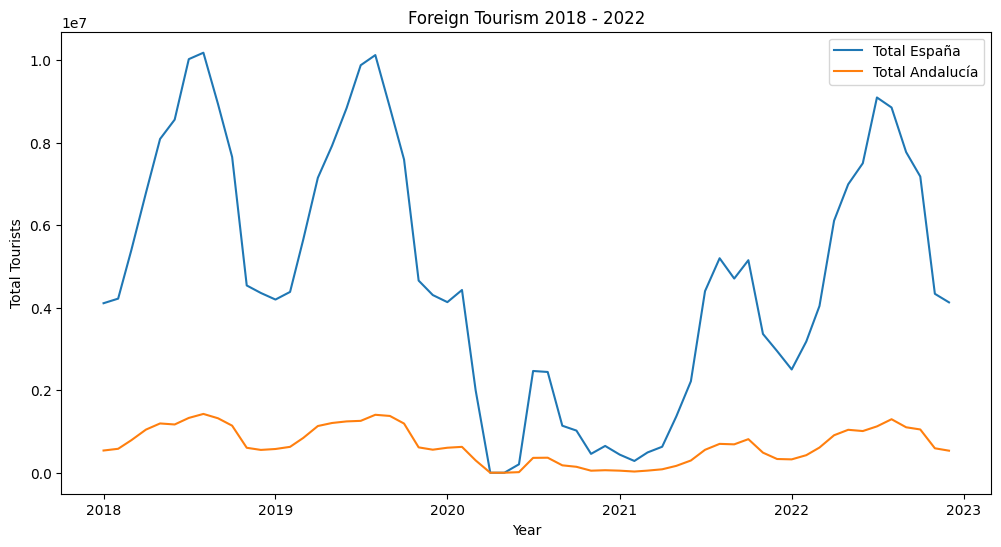

In [59]:
# Create a line graph comparing the temporal evolution of 'Total Spain' and 'Total Andalusia'
plt.figure(figsize = (12, 6))

plt.plot(df_number_foreign_tourists["Periodo"], df_number_foreign_tourists["Total España"], label = "Total España")
plt.plot(df_number_foreign_tourists["Periodo"], df_number_foreign_tourists["Total Andalucía"], label = "Total Andalucía")

plt.title("Foreign Tourism 2018 - 2022")
plt.xlabel("Year")
plt.ylabel("Total Tourists")
plt.legend();

plt.savefig("./graphs/Foreign Tourism 2018 - 2022.png")

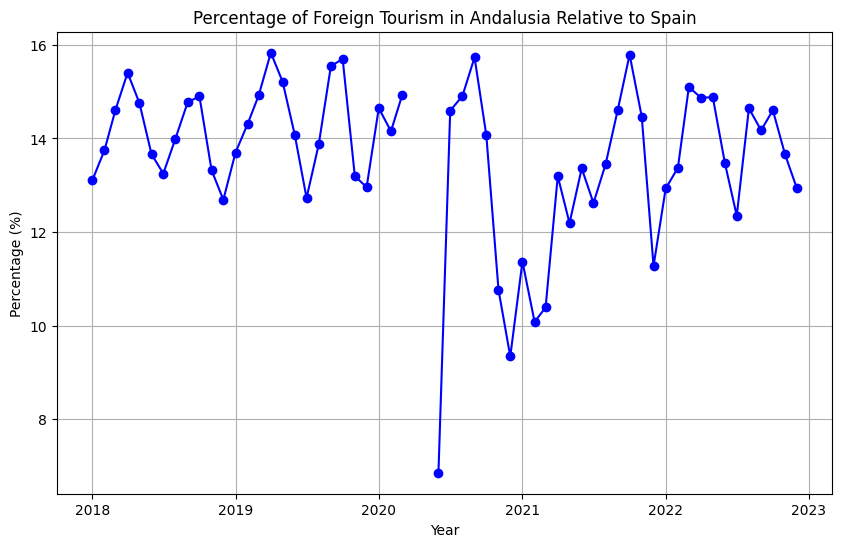

In [60]:
# Create a line graph to observe the evolution of the percentage of foreign tourism in Andalusia relative to Spain
plt.figure(figsize = (10, 6))

plt.plot(df_number_foreign_tourists_percentage["Periodo"], df_number_foreign_tourists_percentage["Porcentaje Andalucía"], marker = "o", color = "b", linestyle = "-")

plt.title("Percentage of Foreign Tourism in Andalusia Relative to Spain")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.grid(True);

plt.savefig("./graphs/Percentage of Foreign Tourism in Andalusia Relative to Spain.png")

### Conclusion

Regarding foreign tourism in Spain compared to that in Andalusia, we can see in the data and graphs that both in 2018 and 2019 the trends are nearly identical. The line graph shows a matching pattern in both years, for both "Total Spain" and "Total Andalusia."  
However, we notice that in the early months of 2020, the graph diverges, which is due to the declaration of the COVID-19 pandemic and the lockdown experienced by many countries.  
After this, we see some rebounds, primarily during the summer months, and gradually we are returning to the levels we had before the pandemic. However, we can observe that in 2022, we have still not recovered the pre-pandemic tourism levels.

In terms of percentages, we see much more fluctuation, and there is no marked pattern as in the other graph. Of course, we also reflect the impact of the pandemic on tourism, where we see periods with no data and an ongoing recovery.  
It is noteworthy that the months when fewer foreigners visit Andalusia are in the summer. If we look at the graph, we see a rise in the months leading up to summer, followed by a drop, and then another rise after summer. Therefore, we can say that the peak months for foreign tourism in Andalusia are March, April, May, September, and October.

<a id="6"></a> <br>
### National tourists who travel VS National tourists who visit Andalusia

In [61]:
# Create our dataframe
df_domestic_trips_total = pd.read_csv("./data/Number of Domestic Tourists in Total.csv", encoding = "latin1", sep = ";")

# Remove unnecessary columns
df_domestic_trips_total = df_domestic_trips_total.drop(["Concepto turístico", "Tipo de dato", "Destino"], axis = 1)

# Convert the 'Period' column to date format and modify the 'Total' column
df_domestic_trips_total["Periodo"] = pd.to_datetime(df_domestic_trips_total["Periodo"], format = "%Y")
df_domestic_trips_total["Total"] = df_domestic_trips_total["Total"].str.replace(".", "").astype(int)

In [62]:
df_domestic_trips_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Periodo  5 non-null      datetime64[ns]
 1   Total    5 non-null      int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 188.0 bytes


In [63]:
df_domestic_trips_total

,Periodo,Total
0,2022-01-01,171388138
1,2021-01-01,142893461
2,2020-01-01,101523862
3,2019-01-01,193874716
4,2018-01-01,196079470


In [64]:
# Create our dataframe
df_domestic_trips_andalusia = pd.read_csv("./data/Number of Domestic Tourists in Andalusia.csv", encoding = "latin1", sep = ";")

# Remove unnecessary columns and rename them
df_domestic_trips_andalusia = df_domestic_trips_andalusia.drop(["Concepto turístico", "Tipo de dato", "Destino"], axis = 1)
df_domestic_trips_andalusia = df_domestic_trips_andalusia.rename(columns={"Total" : "Total Andalucía"})

# Convert the 'Period' column to date format and modify the 'Total Andalusia' column
df_domestic_trips_andalusia["Periodo"] = pd.to_datetime(df_domestic_trips_andalusia["Periodo"], format = "%Y")
df_domestic_trips_andalusia["Total Andalucía"] = df_domestic_trips_andalusia["Total Andalucía"].str.replace(".", "").astype(int)

In [65]:
df_domestic_trips_andalusia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Periodo          5 non-null      datetime64[ns]
 1   Total Andalucía  5 non-null      int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 188.0 bytes


In [66]:
df_domestic_trips_andalusia

,Periodo,Total Andalucía
0,2022-01-01,28120282
1,2021-01-01,25978674
2,2020-01-01,18889241
3,2019-01-01,32717537
4,2018-01-01,32647910


In [67]:
# Merge both tables into one
df_number_domestic_trips = pd.merge(df_domestic_trips_total, df_domestic_trips_andalusia, on = "Periodo", how = "inner")

df_number_domestic_trips

,Periodo,Total,Total Andalucía
0,2022-01-01,171388138,28120282
1,2021-01-01,142893461,25978674
2,2020-01-01,101523862,18889241
3,2019-01-01,193874716,32717537
4,2018-01-01,196079470,32647910


In [68]:
# Calculate the percentage of domestic tourists coming to Andalusia relative to other destinations
df_number_domestic_tourists_percentage = pd.merge(df_domestic_trips_total, df_domestic_trips_andalusia, on = "Periodo", how = "inner")
df_number_domestic_tourists_percentage["Porcentaje Andalucía"] = (df_number_domestic_tourists_percentage["Total Andalucía"] / df_number_domestic_tourists_percentage["Total"]) * 100

df_number_domestic_tourists_percentage

,Periodo,Total,Total Andalucía,Porcentaje Andalucía
0,2022-01-01,171388138,28120282,16.407368
1,2021-01-01,142893461,25978674,18.180450
2,2020-01-01,101523862,18889241,18.605716
3,2019-01-01,193874716,32717537,16.875608
4,2018-01-01,196079470,32647910,16.650346


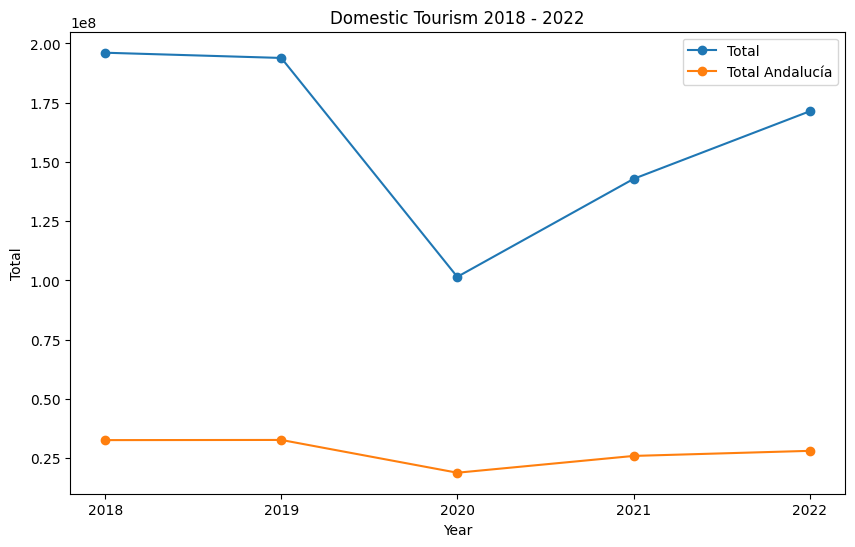

In [69]:
# Create a line graph with the columns from our dataframe
plt.figure(figsize = (10, 6))

plt.plot(df_number_domestic_trips["Periodo"], df_number_domestic_trips["Total"], marker = "o", label = "Total")
plt.plot(df_number_domestic_trips["Periodo"], df_number_domestic_trips["Total Andalucía"], marker = "o", label = "Total Andalucía")

plt.title("Domestic Tourism 2018 - 2022")
plt.xlabel("Year")
plt.ylabel("Total")
plt.legend()

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y"));

plt.savefig("./graphs/Domestic Tourism 2018 - 2022.png")

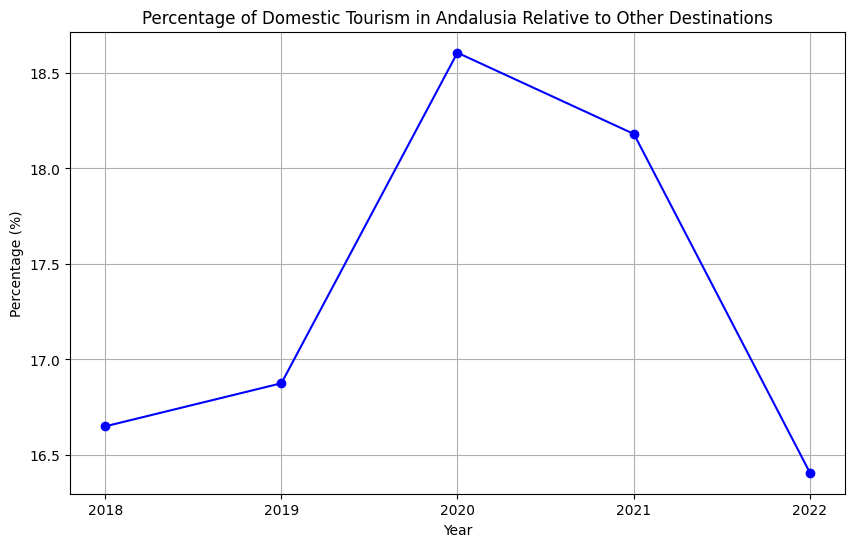

In [70]:
# Create a line graph to observe the evolution of the percentage of domestic tourism in Andalusia relative to other destinations
plt.figure(figsize = (10, 6))

plt.plot(df_number_domestic_tourists_percentage["Periodo"], df_number_domestic_tourists_percentage["Porcentaje Andalucía"], marker = "o", color = "b", linestyle = "-")

plt.title("Percentage of Domestic Tourism in Andalusia Relative to Other Destinations")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.grid(True)

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y"));

plt.savefig("./graphs/Percentage of Domestic Tourism in Andalusia Relative to Other Destinations.png")

### Conclusion

In this analysis, the data is annual rather than monthly, as in the case of foreign tourism.

Regarding the number of domestic travelers compared to those who choose to travel to Andalusia, we can see in the data and graphs that both lines exhibit a similar pattern, with the difference being that the "Total Andalusia" line does not show as sharp declines.  
The drop observed in 2020 is again due to the COVID-19 pandemic, which caused a decrease in the number of people traveling; while there was also a decline in Andalusia, it was not as significant. In fact, for "Total Andalusia," we see that despite the pandemic, the line retains its relatively straight trajectory.  
This is likely due to the restrictions imposed by COVID-19, making it much easier to move within one's own Autonomous Community or country than to travel to other destinations.

This point is further emphasized in the percentage graph, where we see that in 2020 and 2021, the percentage of domestic tourism in Andalusia reaches unusual levels. Conversely, in 2022, this percentage falls below pre-pandemic figures, perhaps due to the lifting of restrictions and the reduction of fear regarding new virus infections.

### Additional Conclusion

Now, if we compare the percentages of foreign tourism and domestic tourism in Andalusia, making the necessary adjustments to standardize the analysis, we can see that there are more domestic travelers choosing to visit Andalusia than there are foreign tourists coming to Spain who select Andalusia as their main destination.  
Moreover, the highest percentage of foreign tourism in Andalusia is quite far from the lowest percentage of domestic tourism.

The average percentage of foreign tourism in Andalusia is: 14.07
The average percentage of domestic tourism in Andalusia is: 17.34


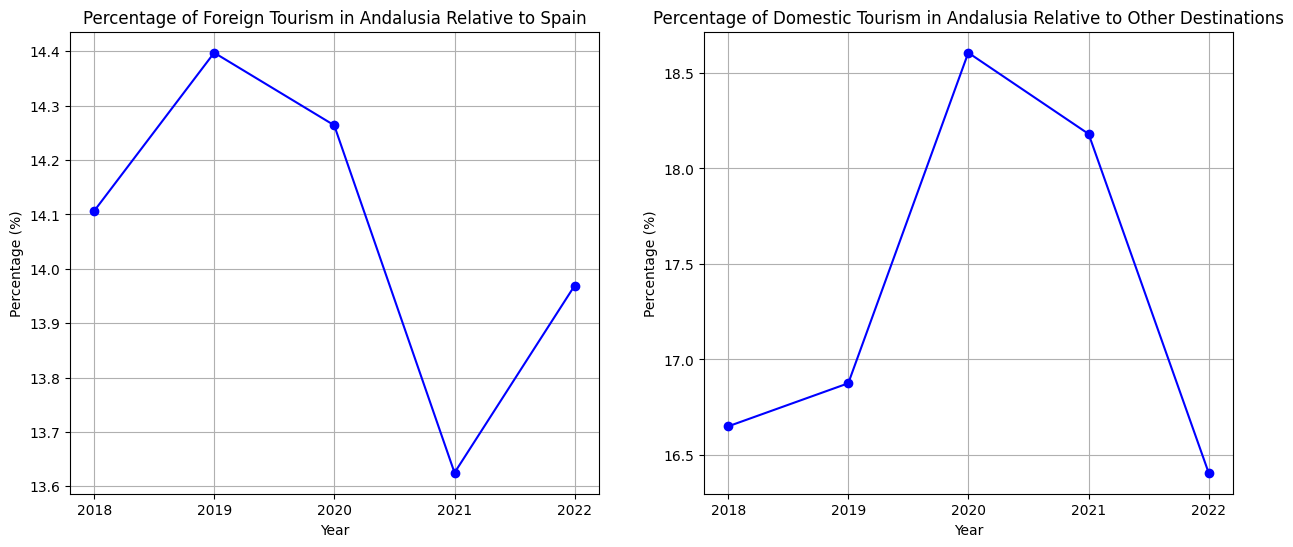

In [71]:
# Calculate the number of foreign tourists per full year and their percentage
df_foreign_spain_year = df_foreign_tourists_spain.copy()
df_foreign_spain_year["Periodo"] = df_foreign_spain_year["Periodo"].dt.year
df_foreign_spain_year = df_foreign_spain_year.groupby(["Periodo"])["Total España"].sum().reset_index()
df_foreign_spain_year["Periodo"] = pd.to_datetime(df_foreign_spain_year["Periodo"], format = "%Y")

df_foreign_andalusia_year = df_foreign_tourists_andalusia.copy()
df_foreign_andalusia_year["Periodo"] = df_foreign_andalusia_year["Periodo"].dt.year
df_foreign_andalusia_year = df_foreign_andalusia_year.groupby(["Periodo"])["Total Andalucía"].sum().reset_index()
df_foreign_andalusia_year["Periodo"] = pd.to_datetime(df_foreign_andalusia_year["Periodo"], format = "%Y")

df_number_foreign_year = pd.merge(df_foreign_spain_year, df_foreign_andalusia_year, on = "Periodo", how = "inner")
df_number_foreign_year["Porcentaje Andalucía"] = (df_number_foreign_year["Total Andalucía"] / df_number_foreign_year["Total España"]) * 100

# Represent the graphs of foreign and domestic tourism percentages
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

axs[0].plot(df_number_foreign_year["Periodo"], df_number_foreign_year["Porcentaje Andalucía"], marker = "o", color = "b", linestyle = "-")
axs[0].set_title("Percentage of Foreign Tourism in Andalusia Relative to Spain")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Percentage (%)")
axs[0].grid(True)
axs[0].xaxis.set_major_locator(YearLocator())
axs[0].xaxis.set_major_formatter(DateFormatter("%Y"))

axs[1].plot(df_number_domestic_tourists_percentage["Periodo"], df_number_domestic_tourists_percentage["Porcentaje Andalucía"], marker = "o", color = "b", linestyle = "-")
axs[1].set_title("Percentage of Domestic Tourism in Andalusia Relative to Other Destinations")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Percentage (%)")
axs[1].grid(True)
axs[1].xaxis.set_major_locator(YearLocator())
axs[1].xaxis.set_major_formatter(DateFormatter("%Y"));

plt.savefig("./graphs/Foreign Tourism Percentage VS Domestic Tourism Percentage.png")

# Calculate the average percentages
average_percentage_foreign_tourism = df_number_foreign_year["Porcentaje Andalucía"].mean().round(2)
average_percentage_domestic_tourism = df_number_domestic_tourists_percentage["Porcentaje Andalucía"].mean().round(2)

print("The average percentage of foreign tourism in Andalusia is:", average_percentage_foreign_tourism)
print("The average percentage of domestic tourism in Andalusia is:", average_percentage_domestic_tourism)

<a id="7"></a> <br>
### Type of trips of foreign tourists in Andalusia VS Type of trips of national tourists in Andalusia

In [72]:
# Create our dataframe
df_foreign_tourism_reason = pd.read_csv("./data/Number of foreign tourists by main reason for travel.csv", encoding = "latin1", sep = ";")

# Drop unnecessary columns and rename
df_foreign_tourism_reason = df_foreign_tourism_reason.drop(["Tipo de dato"], axis = 1)
df_foreign_tourism_reason = df_foreign_tourism_reason.rename(columns = {"Total" : "Total Turismo Extranjero"})

# Convert the 'Period' column to date format and modify the 'Total Foreign Tourism' column
df_foreign_tourism_reason["Periodo"] = pd.to_datetime(df_foreign_tourism_reason["Periodo"], format = "%YM%m")
df_foreign_tourism_reason["Total Turismo Extranjero"] = df_foreign_tourism_reason["Total Turismo Extranjero"].str.replace(".", "").astype(int)

# Change the label 'Business, professional reasons' to 'Business and other professional reasons'
df_foreign_tourism_reason.loc[df_foreign_tourism_reason["Motivo del viaje"] == "Negocio, motivos profesionales", "Motivo del viaje"] = "Negocios y otros motivos profesionales"

# Sum the tourism figures for the complete year
df_foreign_tourism_reason["Año"] = df_foreign_tourism_reason["Periodo"].dt.year
df_foreign_tourism_reason = df_foreign_tourism_reason.groupby(["Año", "Motivo del viaje"])["Total Turismo Extranjero"].sum().reset_index()
df_foreign_tourism_reason["Año"] = pd.to_datetime(df_foreign_tourism_reason["Año"], format = "%Y")

In [73]:
df_foreign_tourism_reason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Año                       15 non-null     datetime64[ns]
 1   Motivo del viaje          15 non-null     object        
 2   Total Turismo Extranjero  15 non-null     int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 428.0+ bytes


In [74]:
df_foreign_tourism_reason

,Año,Motivo del viaje,Total Turismo Extranjero
0,2018-01-01,Negocios y otros motivos profesionales,5023357
1,2018-01-01,"Ocio, recreo y vacaciones",72173054
2,2018-01-01,Otros motivos,5612007
3,2019-01-01,Negocios y otros motivos profesionales,5409184
4,2019-01-01,"Ocio, recreo y vacaciones",72976424
5,2019-01-01,Otros motivos,5123547
6,2020-01-01,Negocios y otros motivos profesionales,1346061
7,2020-01-01,"Ocio, recreo y vacaciones",15533527
8,2020-01-01,Otros motivos,2053516
9,2021-01-01,Negocios y otros motivos profesionales,2076220


In [75]:
# Create our dataframe
df_national_tourism_reason = pd.read_csv("./data/Number of national tourists by main reason for travel.csv", encoding = "latin1", sep = ";")

# Drop unnecessary columns and rename
df_national_tourism_reason = df_national_tourism_reason.drop(["Destino principal", "Comunidad autónoma de residencia", "Duración del viaje", "Forma de organización del viaje", "Transporte principal", "Alojamiento principal: Nivel 1", "Alojamiento principal: Nivel 2", "Concepto turístico"], axis = 1)
df_national_tourism_reason = df_national_tourism_reason.rename(columns = {"Total" : "Total Turismo Nacional", "Periodo" : "Año", "Motivo principal" : "Motivo del viaje"})

# Convert the 'Year' column to date format and modify the 'Total National Tourism' column
df_national_tourism_reason["Año"] = pd.to_datetime(df_national_tourism_reason["Año"], format = "%Y")
df_national_tourism_reason["Total Turismo Nacional"] = df_national_tourism_reason["Total Turismo Nacional"].str.replace(".", "").astype(int)

In [76]:
df_national_tourism_reason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Motivo del viaje        15 non-null     object        
 1   Año                     15 non-null     datetime64[ns]
 2   Total Turismo Nacional  15 non-null     int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 428.0+ bytes


In [77]:
df_national_tourism_reason

,Motivo del viaje,Año,Total Turismo Nacional
0,Negocios y otros motivos profesionales,2022-01-01,2236181
1,Negocios y otros motivos profesionales,2021-01-01,2124329
2,Negocios y otros motivos profesionales,2020-01-01,1689299
3,Negocios y otros motivos profesionales,2019-01-01,1893374
4,Negocios y otros motivos profesionales,2018-01-01,2611443
5,"Ocio, recreo y vacaciones",2022-01-01,15353501
6,"Ocio, recreo y vacaciones",2021-01-01,13009298
7,"Ocio, recreo y vacaciones",2020-01-01,9103251
8,"Ocio, recreo y vacaciones",2019-01-01,17590612
9,"Ocio, recreo y vacaciones",2018-01-01,16963300


In [78]:
# Combine all tables into one
df_tourism_reason = pd.merge(df_foreign_tourism_reason, df_national_tourism_reason, on = ["Año", "Motivo del viaje"], how = "inner")

df_tourism_reason

,Año,Motivo del viaje,Total Turismo Extranjero,Total Turismo Nacional
0,2018-01-01,Negocios y otros motivos profesionales,5023357,2611443
1,2018-01-01,"Ocio, recreo y vacaciones",72173054,16963300
2,2018-01-01,Otros motivos,5612007,1583963
3,2019-01-01,Negocios y otros motivos profesionales,5409184,1893374
4,2019-01-01,"Ocio, recreo y vacaciones",72976424,17590612
5,2019-01-01,Otros motivos,5123547,1797527
6,2020-01-01,Negocios y otros motivos profesionales,1346061,1689299
7,2020-01-01,"Ocio, recreo y vacaciones",15533527,9103251
8,2020-01-01,Otros motivos,2053516,888960
9,2021-01-01,Negocios y otros motivos profesionales,2076220,2124329


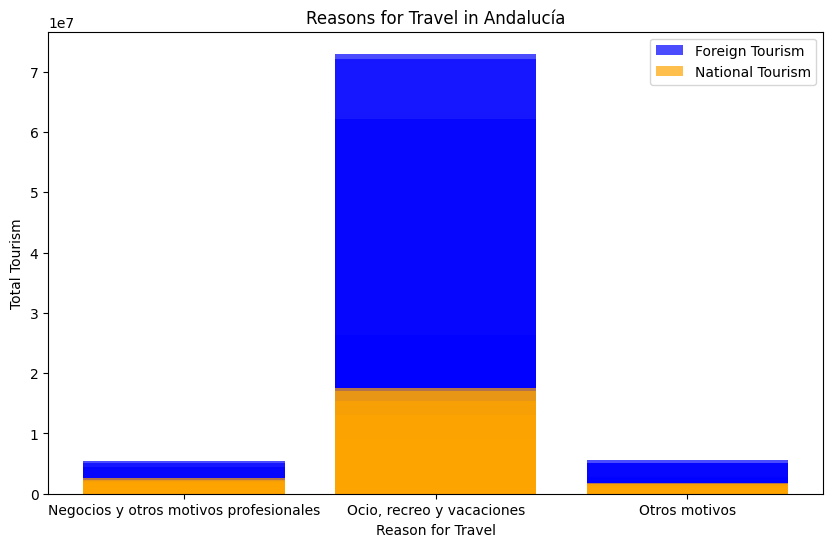

In [79]:
# Create a bar chart showing foreign and national tourism by reason for travel
plt.figure(figsize = (10, 6))

plt.bar(df_tourism_reason["Motivo del viaje"], df_tourism_reason["Total Turismo Extranjero"], color = "blue", alpha = 0.7, label = "Foreign Tourism")
plt.bar(df_tourism_reason["Motivo del viaje"], df_tourism_reason["Total Turismo Nacional"], color = "orange", alpha = 0.7, label = "National Tourism")

plt.title("Reasons for Travel in Andalucía")
plt.xlabel("Reason for Travel")
plt.ylabel("Total Tourism")
plt.legend();

plt.savefig("./graphs/Reasons for Travel in Andalucía.png")

### Conclusion

In this analysis, and looking at the graph, we can see that the movements of foreign and national individuals in Andalucía motivated by professional reasons are quite similar.  
However, when we look at vacation-related reasons, we see that Andalucía is a popular destination for foreign tourism for this purpose, but not so much for national tourism. It would be worthwhile to delve deeper into this analysis to determine what types of leisure or vacations prevail among foreign tourists.  
On the other hand, under "Other reasons," we see that foreign tourism also has higher figures compared to national tourism. It might be interesting to know what is included in that category to better understand the motivations of foreigners.

<a id="8"></a> <br>
### Spending by foreign tourists in Andalusia VS Spending by national tourists in Andalusia

In [80]:
# Create our dataframe
df_foreign_tourism_spending = pd.read_csv("./data/Spending of foreign tourists in Andalusia.csv", encoding = "latin1", sep = ";")

# Drop unnecessary columns and rename
df_foreign_tourism_spending = df_foreign_tourism_spending.drop(["Comunidades  autónomas", "Gastos y duración media de los viajes", "Tipo de dato"], axis = 1)
df_foreign_tourism_spending = df_foreign_tourism_spending.rename(columns={"Total" : "Total Gasto Extranjero"})

# Convert the 'Year' column to date format and modify the 'Total Foreign Spending' column
df_foreign_tourism_spending["Periodo"] = pd.to_datetime(df_foreign_tourism_spending["Periodo"], format = "%YM%m")
df_foreign_tourism_spending["Total Gasto Extranjero"] = df_foreign_tourism_spending["Total Gasto Extranjero"].str.replace(".", "").str.replace(",", ".").astype(float)

# Sum the figures by the full year
df_foreign_tourism_spending = df_foreign_tourism_spending.groupby(df_foreign_tourism_spending["Periodo"].dt.year)["Total Gasto Extranjero"].sum().reset_index()
df_foreign_tourism_spending["Periodo"] = pd.to_datetime(df_foreign_tourism_spending["Periodo"], format = "%Y")

# Convert the amounts from millions to thousands
df_foreign_tourism_spending["Total Gasto Extranjero"] *= 1000

In [81]:
df_foreign_tourism_spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Periodo                 5 non-null      datetime64[ns]
 1   Total Gasto Extranjero  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 208.0 bytes


In [82]:
df_foreign_tourism_spending

,Periodo,Total Gasto Extranjero
0,2018-01-01,12641390.0
1,2019-01-01,12412970.0
2,2020-01-01,2875140.0
3,2021-01-01,4768270.0
4,2022-01-01,11989590.0


In [83]:
# Create our dataframe
df_national_tourism_spending = pd.read_csv("./data/Spending of national tourists in Andalusia.csv", encoding = "latin1", sep = ";")

# Drop unnecessary columns and rename
df_national_tourism_spending = df_national_tourism_spending.drop(["Destino", "Tipo de dato", "Concepto turístico"], axis = 1)
df_national_tourism_spending = df_national_tourism_spending.rename(columns={"Total" : "Total Gasto Nacional"})

# Convert the 'Year' column to date format and modify the 'Total National Spending' column
df_national_tourism_spending["Periodo"] = pd.to_datetime(df_national_tourism_spending["Periodo"], format = "%Y")
df_national_tourism_spending["Total Gasto Nacional"] = df_national_tourism_spending["Total Gasto Nacional"].str.replace(".", "").str.replace(",", ".").astype(float)

In [84]:
df_national_tourism_spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Periodo               5 non-null      datetime64[ns]
 1   Total Gasto Nacional  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 208.0 bytes


In [85]:
df_national_tourism_spending

,Periodo,Total Gasto Nacional
0,2022-01-01,6963409.04
1,2021-01-01,5623362.82
2,2020-01-01,3717146.38
3,2019-01-01,6524677.10
4,2018-01-01,6065520.28


In [86]:
# Merge all the tables into one
df_tourism_spending = pd.merge(df_foreign_tourism_spending, df_national_tourism_spending, on = "Periodo", how = "inner")

df_tourism_spending

,Periodo,Total Gasto Extranjero,Total Gasto Nacional
0,2018-01-01,12641390.0,6065520.28
1,2019-01-01,12412970.0,6524677.10
2,2020-01-01,2875140.0,3717146.38
3,2021-01-01,4768270.0,5623362.82
4,2022-01-01,11989590.0,6963409.04


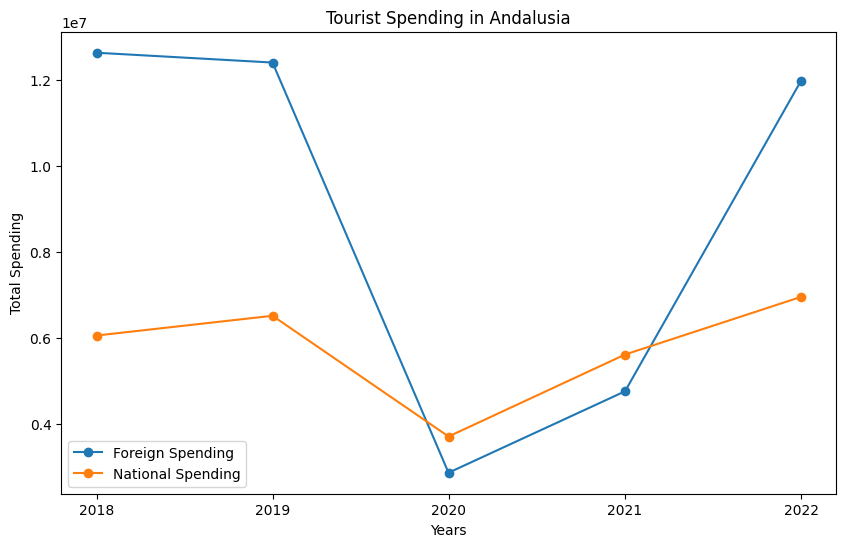

In [87]:
# Create a line plot showing the evolution of total tourist spending in Andalusia by whether they are national or foreign
plt.figure(figsize = (10, 6))

plt.plot(df_tourism_spending["Periodo"], df_tourism_spending["Total Gasto Extranjero"], marker = "o", label = "Foreign Spending")
plt.plot(df_tourism_spending["Periodo"], df_tourism_spending["Total Gasto Nacional"], marker = "o", label = "National Spending")

plt.title("Tourist Spending in Andalusia")
plt.xlabel("Years")
plt.ylabel("Total Spending")
plt.legend()

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y"));

plt.savefig("./graphs/Tourist Spending in Andalusia.png")

### Conclusion

In this analysis, and by observing the chart, we can see the spending patterns of both foreign and national tourists in Andalusia.
We notice a slight decline in foreign spending in 2019, accompanied by a small increase in national spending.
In 2020 and 2021, national spending surpasses foreign spending. This shift is due to the COVID-19 pandemic, which, because of border closures, lockdowns, and the slow return to normality, encouraged people to travel and spend more within their own countries rather than abroad.
By 2022, we can see a return to more typical figures. However, it is noteworthy that national spending remains above pre-pandemic levels, while foreign spending has yet to reach the numbers seen before 2020.

<a id="9"></a> <br>
### BONUS: Foreign tourism in Spain according to the country of origin

In [88]:
# Create our dataframe
df_foreign_tourism_origin = pd.read_csv("./data/Number of foreign tourists by country of residence.csv", encoding = "latin1", sep = ";")

# Drop unnecessary columns
df_foreign_tourism_origin = df_foreign_tourism_origin.drop(["Tipo de dato"], axis = 1)

# Remove rows with null values
df_foreign_tourism_origin = df_foreign_tourism_origin.dropna()

# Convert the 'Period' column to date format and modify the 'Total' column
df_foreign_tourism_origin["Periodo"] = pd.to_datetime(df_foreign_tourism_origin["Periodo"], format = "%YM%m")
df_foreign_tourism_origin["Total"] = df_foreign_tourism_origin["Total"].str.replace(".", "").replace("", "0").astype(int)

# Sum the figures by full year
df_foreign_tourism_origin["Año"] = df_foreign_tourism_origin["Periodo"].dt.year
df_foreign_tourism_origin = df_foreign_tourism_origin.groupby(["Año", "País de residencia"])["Total"].sum().reset_index()
df_foreign_tourism_origin["Año"] = pd.to_datetime(df_foreign_tourism_origin["Año"], format = "%Y")

In [89]:
df_foreign_tourism_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Año                 60 non-null     datetime64[ns]
 1   País de residencia  60 non-null     object        
 2   Total               60 non-null     int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 1.3+ KB


In [90]:
df_foreign_tourism_origin.head()

,Año,País de residencia,Total
0,2018-01-01,Alemania,11414955
1,2018-01-01,Bélgica,2505146
2,2018-01-01,Estados Unidos de América,2959487
3,2018-01-01,Francia,11293321
4,2018-01-01,Irlanda,2053386


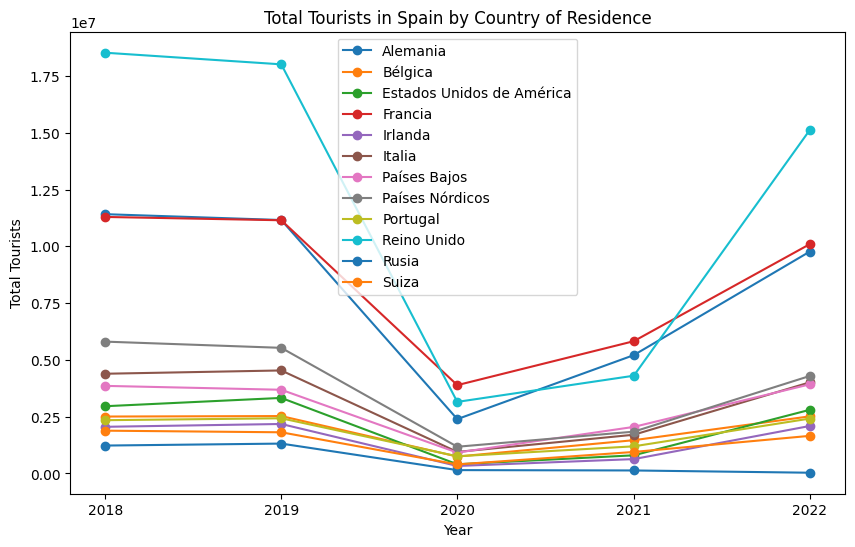

In [91]:
# Create a line plot showing the evolution of the total number of tourists to Spain by their country of residence
plt.figure(figsize = (10, 6))

for i, country in enumerate(df_foreign_tourism_origin["País de residencia"].unique()):
    country_data = df_foreign_tourism_origin[df_foreign_tourism_origin["País de residencia"] == country]
    plt.plot(country_data["Año"], country_data["Total"], marker = "o", label = country)

plt.title("Total Tourists in Spain by Country of Residence")
plt.xlabel("Year")
plt.ylabel("Total Tourists")
plt.legend()

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y"));

plt.savefig("./graphs/Total Tourists in Spain by Country of Residence.png")

### Conclusion

Although these data are from Spain, in the absence of specific data for Andalusia, I have considered them useful to provide an overview of the origin of tourists coming from abroad.

In this chart, we see that countries bordering Spain are not necessarily the ones that visit the most. France ranks 2nd or 3rd, but Portugal, despite being on the Iberian Peninsula, is among the countries with the fewest visitors.
The countries that visit the most are the United Kingdom and Germany, with the UK leading by a significant margin.
The chart also shows the impact of the COVID-19 pandemic, particularly a sharp decline in British tourists. Their numbers drop below both Germany and France. This could be due not only to pandemic restrictions, which might have been stricter due to air travel access compared to neighboring countries, but also to the effects of Brexit, which took place at the beginning of 2020.